# NLP 실습 보고서

## 데이터셋

- KBS 뉴스 사이트의 헤드라인 자료
- 경제로 검색한 결과를 8월 5일부터 역순으로 수집하여 데이터 약 5000개를 크롤링
- 크롤링 과정은 생략한다

## 데이터 불러오기

In [2]:
# (실습3) 이미지
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
title_list_all = pd.read_csv('C:\\Users\\user\\iCloudDrive\\Documents\\AI_professional\\NLP\\title_list_all.csv')

In [4]:
title_list_all = title_list_all['0']

In [5]:
title_list_all

0                          코스피 2,311.86 코스닥 847.28
1                             “수도권 1극 체제를 양극 체제로!”
2           코로나19에 제주항공 2분기 영업손실 847억 원…매출액 88.5%↓
3       [오태훈의 시사본부] 이혜훈 “진짜 공급 원한다면 강남 재건축 규제 풀어야”
4                 코스피 1.4% 상승해 2,310선 돌파…연중 최고치 기록
                           ...                    
5055              캐나다 “경제 재개 신중히 하지 않으면 코로나19 재확산”
5056     철도특별사법경찰대 “‘서울역 폭행사건’ 영장 기각사유 검토해 철저히 수사”
5057               USTR 대표 “미·중 1단계 무역합의 진행 매우 좋다”
5058                         트럼프, 코로나19 틈타 환경규제 완화
5059                       디지털 뉴딜 핵심 ‘비대면’…대비 철저해야
Name: 0, Length: 5060, dtype: object

## 불용어 설정

In [6]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

news_stop_words = "의 가 이 은 들 는 좀 잘 걍 과 도 를 으로 자 에 와 한 하다 등 개 명 중 첫 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
news_stop_words = news_stop_words.split(' ')
news_stop_words[0:10]

['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과']

## 불용어 제거

In [7]:
# 불용어 제거
news_nouns = []
for post in title_list_all:
    for noun in tagger.nouns(post):
        if noun not in news_stop_words:
            news_nouns.append(noun)

news_nouns[0:10]

['코스피', '코스닥', '수도', '극', '체제', '양극', '체제', '코로나', '제주항공', '분기']

## 워드클라우드

{'코로나': 570, '경제': 413, '정부': 177, '주택': 167, '대책': 149, '차': 146, '부동산': 141, '뉴스': 140, '코스피': 138, '확진': 135, '지원': 131, '지역': 127, '기업': 124, '투자': 109, '한국': 108, '상승': 106, '달': 105, '억': 104, '천': 104, '주': 102, '추진': 101, '규제': 100, '서울': 99, '대통령': 95, '코스닥': 94, '대': 94, '조': 94, '美': 93, '시장': 92, '뉴딜': 91, '문': 90, '수도': 89, '미': 89, '최대': 89, '감소': 88, '중국': 87, '자막': 87, '일자리': 86, '수출': 86, '통합': 85, '우려': 85, '확산': 85, '시사': 84, '위기': 82, '국회': 82, '거래': 81, '사업': 81, '발표': 78, '금융': 78, '아파트': 77, '미국': 75, '日': 74, '논의': 74, '중단': 73, '분기': 71, '완화': 71, '트럼프': 71, '회복': 70, '증가': 70, '산업': 70}


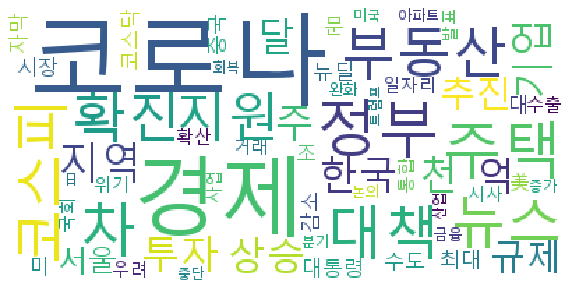

In [8]:
from collections import Counter
num_top_nouns = 60
news_nouns_counter = Counter(news_nouns)
news_top_nouns = dict(news_nouns_counter.most_common(num_top_nouns))
print(news_top_nouns)

from wordcloud import WordCloud
news_wc = WordCloud(background_color="white", font_path='./font/malgun.ttf')
news_wc.generate_from_frequencies(news_top_nouns)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(news_wc)

## BoW

- CountVectoerizer 사용

In [9]:
from konlpy.tag import Okt
tokenizer = Okt()

In [49]:
bow = news_nouns
title_list_all

0                          코스피 2,311.86 코스닥 847.28
1                             “수도권 1극 체제를 양극 체제로!”
2           코로나19에 제주항공 2분기 영업손실 847억 원…매출액 88.5%↓
3       [오태훈의 시사본부] 이혜훈 “진짜 공급 원한다면 강남 재건축 규제 풀어야”
4                 코스피 1.4% 상승해 2,310선 돌파…연중 최고치 기록
                           ...                    
5055              캐나다 “경제 재개 신중히 하지 않으면 코로나19 재확산”
5056     철도특별사법경찰대 “‘서울역 폭행사건’ 영장 기각사유 검토해 철저히 수사”
5057               USTR 대표 “미·중 1단계 무역합의 진행 매우 좋다”
5058                         트럼프, 코로나19 틈타 환경규제 완화
5059                       디지털 뉴딜 핵심 ‘비대면’…대비 철저해야
Name: 0, Length: 5060, dtype: object

## 문장 토큰화

In [50]:
# post = title_list_all[0]
# token_list = []
# title = []
# for morph in tagger.morphs(post):
#     tokens = tokens + ' ' + morph
    
tokens = []    
token_list = []
for post in title_list_all:
    morph1 = []
    for morph in tagger.morphs(post):
        morph1.append(morph)
    tokens = " ".join(morph1)
#         tokens.append(morph+' ')
    token_list.append(tokens)

In [60]:
# token = []
# i = 0
# for post in title_list_all[0]:
#     title = []
#     for morph in tagger.morphs(post):
#         tokens.append(morph)
#         title = " ".join(tokens)
#     tokens.append(title)
        
token_list

['코스피 2 , 311 . 86 코스닥 847 . 28',
 '“ 수도 권 1 극 체제 를 양극 체제 로 ! ”',
 '코로나 19 에 제주항공 2 분기 영업 손실 847 억 원 … 매출액 88 . 5 %↓',
 '[ 오태훈 의 시사 본부 ] 이혜훈 “ 진짜 공급 원한다면 강남 재건축 규제 풀 어야 ”',
 '코스피 1 . 4 % 상승 해 2 , 310 선 돌파 … 연중 최고 치 기록',
 '“ 혁신 도시 , 수도 권 인구 집중 속도 늦춰 ”',
 '공정위 , TV 조선 조사 에 나선 까닭 은 ?',
 'KOSPI 2 , 302 . 69 KOSDAQ 843 . 70',
 'NEWS BRIEF',
 'PLANS TO BUILD MORE HOUSES IN CAPITAL REGION',
 '이재명 , “ 토지 거래 허가제 위 헌 주장 납득 하 기 어려워 ”',
 '법원 , ‘ 펀드 사기 의혹 ’ 옵티머스 대표 에 6 , 894 억 원 추징 보전 명령',
 '코스피 2 , 305 . 78 코스닥 843 . 58',
 '중진 공 , 패션 중소 벤처 기업 원자재 공동 구매 지원',
 '태백선 · 영동선 내일 열차 운행 재개 방침 … 국 도 1 개 선 통제',
 '정정 불안 레바논 서 대형 폭발 … 70 여 명 사망 · 3 천 7 백 여 명 부상',
 '‘ 공공재 건축 ’ 정부 - 서울시 엇박자 … ‘ 35 층 ’ 도 입장 차',
 '“ 고가 주택 매매 자금 출처 의심 거래 상시 조사 ”',
 '2 / 4 분기 온라인 쇼핑 거래 액 역대 최고 … “ 코로나 19 영향 ”',
 '태풍 하 구 핏 中 동부 지역 강타 … 피해 속출',
 '홍남기 , “ 집중호우 피해 복구 에 예산 빠르 고 충분 하 게 지원 ”',
 '계속 되 는 폭우 에 농작물 침수 · 가축 폐사 피해 잇따라',
 '소량 생산 차 기준 완화 등 튜닝 규제 추가 완화 추진',
 '정부 , 마스크 ‘ MB 필터 ’ 재수출 허용',
 '월스트리트 저널 , “ 사우디 , 중국 지원 으로 우라늄 추출 시설 건설 ”'

In [83]:
num_top_nouns = 200
news_nouns_counter = Counter(news_nouns)
news_top_nouns = dict(news_nouns_counter.most_common(num_top_nouns))

# # 토큰을 문자열로 변환
tokenss= list(news_top_nouns.keys())
print(tokenss)

['코로나', '경제', '정부', '주택', '대책', '차', '부동산', '뉴스', '코스피', '확진', '지원', '지역', '기업', '투자', '한국', '상승', '달', '억', '천', '주', '추진', '규제', '서울', '대통령', '코스닥', '대', '조', '美', '시장', '뉴딜', '문', '수도', '미', '최대', '감소', '중국', '자막', '일자리', '수출', '통합', '우려', '확산', '시사', '위기', '국회', '거래', '사업', '발표', '금융', '아파트', '미국', '日', '논의', '중단', '분기', '완화', '트럼프', '회복', '증가', '산업', '위', '올해', '조사', '공급', '대출', '가능', '추경', '펀드', '정책', '확대', '여의도', '사사건건', '세계', '공공', '최저', '경기', '추가', '효과', '민주당', '고용', '최고', '판매', '논란', '인상', '내년', '최강', '강화', '재개', '법', '연속', '역대', '은행', '이후', '집', '검토', '수사', '다음', '국민', '듯', '피해', '홍남기', '필요', '지원금', '오늘', '민주', '수소', '의원', '도시', '생산', '방역', '주식', '이스타항공', '기준', '부산', '사회', '정상', '급증', '값', '글로벌', '반', '남북', '시설', '이상', '곳', '대북', '성장', '극복', '경남', '지급', '이전', '집중', '속', '대응', '소비', '국가', '전망', '간', '집값', '개월', '의회', '해제', '영향', '행정', '전북', '검찰', '中', '본격', '재난', '결정', '내', '감염', '최저임금', '시민', '차관', '회의', '부', '시작', '북한', '관광', '그린벨트', '라이브', '업체', '충북', '대전', '본부', '서울시', '연

In [84]:
sentence = " ".join(tokenss)

#print(sentence)

# # CountVectorizer의 입력에 맞게 배열로 변경
sentences = []
sentences.append(sentence)

print(sentences)

from sklearn.feature_extraction.text import CountVectorizer

# 1글자도 인식이 되도록 토큰 패턴 변경
cv = CountVectorizer(token_pattern = r"(?u)\b\w+\b")  # 디폴트 : 단어 2개 이상인 경우부터 토큰화해 달라// 그래서 한글자 이상인 걸로 바꾼것. \w
cv.fit(sentences)

print(cv.vocabulary_)

['코로나 경제 정부 주택 대책 차 부동산 뉴스 코스피 확진 지원 지역 기업 투자 한국 상승 달 억 천 주 추진 규제 서울 대통령 코스닥 대 조 美 시장 뉴딜 문 수도 미 최대 감소 중국 자막 일자리 수출 통합 우려 확산 시사 위기 국회 거래 사업 발표 금융 아파트 미국 日 논의 중단 분기 완화 트럼프 회복 증가 산업 위 올해 조사 공급 대출 가능 추경 펀드 정책 확대 여의도 사사건건 세계 공공 최저 경기 추가 효과 민주당 고용 최고 판매 논란 인상 내년 최강 강화 재개 법 연속 역대 은행 이후 집 검토 수사 다음 국민 듯 피해 홍남기 필요 지원금 오늘 민주 수소 의원 도시 생산 방역 주식 이스타항공 기준 부산 사회 정상 급증 값 글로벌 반 남북 시설 이상 곳 대북 성장 극복 경남 지급 이전 집중 속 대응 소비 국가 전망 간 집값 개월 의회 해제 영향 행정 전북 검찰 中 본격 재난 결정 내 감염 최저임금 시민 차관 회의 부 시작 북한 관광 그린벨트 라이브 업체 충북 대전 본부 서울시 연장 일본 장관 전환 기관 하락 촉구 내일 전국 성장률 유통 여파 선 속도 사상 초 국제 신규 조정 이유 유치 뉴욕 이재용 돌파 마스크 공항 임대차 갈등 과제 단체 긴급 공직자 예산 기재']
{'코로나': 179, '경제': 17, '정부': 146, '주택': 154, '대책': 57, '차': 165, '부동산': 77, '뉴스': 48, '코스피': 181, '확진': 196, '지원': 160, '지역': 159, '기업': 37, '투자': 183, '한국': 190, '상승': 86, '달': 52, '억': 108, '천': 167, '주': 152, '추진': 177, '규제': 30, '서울': 88, '대통령': 59, '코스닥': 180, '대': 53, '조': 149, '美': 2, '시장': 105, '뉴딜': 47, '문': 65, '수도': 97, '미': 66, '최대': 172, '감소': 6, '중국': 155, '자막': 138, '일자리': 1

In [85]:
# CountVectorizer로 변환
def convert_cv(sentence, cv):
    
    # 문장을 토큰으로 분리
 #   tokenizer = Okt()
 #   tokens = tokenizer.morphs(sentence)
    
    # 토큰을 문자열로 변환
#    sentence = " ".join(tokens)
#    print(sentence)
    # CountVectorizer의 입력에 맞게 배열로 변경
    sentences = []
    sentences.append(sentence)
    
    # 벡터 변환
    vector = cv.transform(sentences).toarray()    
    
    return vector

print(convert_cv(token_list[1], cv)) # 몇번 나오는지에 대한 것을 나타내주는 것.
print(convert_cv(token_list[1000], cv))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [88]:
# COS 유사도 계산
## cos 유사도 직접 계산
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

print(cos_sim(convert_cv(token_list[1002], cv)[0], convert_cv(token_list[2002], cv)[0]))

0.0


In [89]:
#cos 유사도 함수 활용
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(convert_cv(token_list[1002], cv), convert_cv(token_list[4002], cv))
cosine_sim

array([[0.]])